In [ ]:
!pip install --upgrade scikit-learn



   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0      0.0             0.0  
1  M2044282225             0.0             0.0      0.0             0.0  
2   C553264065             0.0             0.0      1.0             0.0  
3    C38997010         21182.0             0.0      1.0             0.0  
4  M1230701703             0.0             0.0      0.0             0.0  
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newba

Model Accuracy: 0.999271621071574


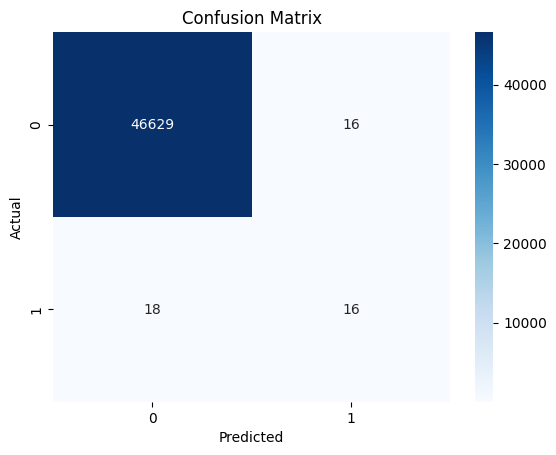

Precision: 0.5
Recall: 0.47058823529411764
F1 Score: 0.48484848484848486
Prediction: [0.]
No Fraud


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import plotly.express as px

# Load the dataset
data = pd.read_csv("/content/onlinefraud.csv")
print(data.head())
print(data.isnull().sum())

# Exploring transaction type
type_counts = data["type"].value_counts()
transactions = type_counts.index
quantity = type_counts.values

# Create a pie chart for transaction types
figure = px.pie(data,
                 values=quantity,
                 names=transactions,
                 hole=0.5,
                 title="Distribution of Transaction Type")
figure.show()

# Checking correlation
data["type"] = data["type"].map({"CASH_OUT": 1, "PAYMENT": 2,
                                  "CASH_IN": 3, "TRANSFER": 4,
                                  "DEBIT": 5})
data["isFraud"] = data["isFraud"].map({0: "No Fraud", 1: "Fraud"})

# Splitting the data
x = np.array(data[["type", "amount", "oldbalanceOrg", "newbalanceOrig"]])
data["isFraud"] = data["isFraud"].map({"No Fraud": 0, "Fraud": 1})
data["isFraud"] = data["isFraud"].fillna(0)
y = np.array(data["isFraud"])

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20, random_state=42)

# Training a Decision Tree model
model = DecisionTreeClassifier()
model.fit(xtrain, ytrain)

# Model evaluation
y_pred = model.predict(xtest)
print(f'Model Accuracy: {accuracy_score(ytest, y_pred)}')

# Confusion Matrix
cm = confusion_matrix(ytest, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculating precision, recall, and F1-score
precision = precision_score(ytest, y_pred)
recall = recall_score(ytest, y_pred)
f1 = f1_score(ytest, y_pred)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Making a prediction
features = np.array([[2, 9839.64, 170136.0, 160296.36]])
prediction = model.predict(features)
print(f'Prediction: {prediction}')
if prediction == 0:
    print("No Fraud")
else:
    print("Fraud")
